In [1]:
%matplotlib inline

_Credits: First two parts of this notebook are based on PyTorch official_ [tensor](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py) _and_ [autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py) _tutorials._


Once again, what is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

Getting Started
---------------

#### Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [2]:
import torch

Construct a 5x3 matrix, uninitialized:



In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[9.1718e+04, 3.0861e-41, 3.3631e-44],
        [0.0000e+00,        nan, 3.0861e-41],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 2.3834e+04]])


Construct a randomly initialized matrix:



In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3636, 0.2049, 0.7367],
        [0.1118, 0.3724, 0.4237],
        [0.2196, 0.3743, 0.8934],
        [0.3845, 0.4550, 0.0816],
        [0.1904, 0.8753, 0.8730]])


Construct a matrix filled zeros and of dtype long:



In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.4216, -1.3187,  1.9725],
        [ 0.0142, -0.7895, -0.9980],
        [ 0.6697, -0.4934,  0.0366],
        [-0.5853, -0.8145, -1.5701],
        [ 0.3828,  0.3195, -1.1225]])


In [8]:
import numpy as np

In [9]:
np.random.randint((2,5))


array([0, 1])

In [10]:
a = np.random.randint((2,5))

# Create a torch tensor from numpy tensor and cast it to float32 type
a_t = torch.tensor(a, dtype=torch.float32)# YOUR CODE HERE
assert a_t.dtype == torch.float32

In [11]:
a_t

tensor([1., 3.])

Get its size:



In [12]:
print(x.size())

torch.Size([5, 3])


In [23]:
x.shape[:2]

torch.Size([5, 3])

<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

#### Operations

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [24]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.0353, -1.0633,  2.0648],
        [ 0.9004,  0.0924, -0.0863],
        [ 0.7228,  0.0775,  0.1363],
        [-0.3208, -0.5059, -1.2328],
        [ 1.0743,  1.0022, -0.7016]])


Addition: syntax 2



In [25]:
print(torch.add(x, y))

tensor([[-0.0353, -1.0633,  2.0648],
        [ 0.9004,  0.0924, -0.0863],
        [ 0.7228,  0.0775,  0.1363],
        [-0.3208, -0.5059, -1.2328],
        [ 1.0743,  1.0022, -0.7016]])


Addition: providing an output tensor as argument



In [26]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.0353, -1.0633,  2.0648],
        [ 0.9004,  0.0924, -0.0863],
        [ 0.7228,  0.0775,  0.1363],
        [-0.3208, -0.5059, -1.2328],
        [ 1.0743,  1.0022, -0.7016]])


Addition: in-place



In [27]:
# adds x to y
y.add_(x)
print(y)

tensor([[-0.0353, -1.0633,  2.0648],
        [ 0.9004,  0.0924, -0.0863],
        [ 0.7228,  0.0775,  0.1363],
        [-0.3208, -0.5059, -1.2328],
        [ 1.0743,  1.0022, -0.7016]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



In [28]:
print(x[:, 1])

tensor([-1.3187, -0.7895, -0.4934, -0.8145,  0.3195])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [29]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [30]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.9808])
-0.9808289408683777


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <http://pytorch.org/docs/torch>`_.

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

#### Converting a Torch Tensor to a NumPy Array



In [31]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [32]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [33]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Converting NumPy Array to Torch Tensor

See how changing the np array changed the Torch Tensor automatically



In [34]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [35]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

In [36]:
z.device

device(type='cpu')

In [37]:
z.shape

torch.Size([2, 8])

In [38]:
a = torch.ones((2, 8))

In [39]:
z.to("cpu") + a

tensor([[ 0.8215, -0.7764,  0.4054,  0.4070,  0.0400,  1.1470,  2.6411,  0.7450],
        [ 1.7680,  2.5602,  1.9960,  1.8257,  1.9134,  1.0848, -0.2604,  2.0185]])

In [40]:
x.device

device(type='cpu')

In [41]:
torch.cuda.is_available()

False


Autograd: Automatic Differentiation
===================================

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our
first neural network.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.

Tensor
--------

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it. When
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To stop a tensor from tracking history, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and using memory), you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

There’s one more class which is very important for autograd
implementation - a ``Function``.

``Tensor`` and ``Function`` are interconnected and build up an acyclic
graph, that encodes a complete history of computation. Each tensor has
a ``.grad_fn`` attribute that references a ``Function`` that has created
the ``Tensor`` (except for Tensors created by the user - their
``grad_fn is None``).

If you want to compute the derivatives, you can call ``.backward()`` on
a ``Tensor``. If ``Tensor`` is a scalar (i.e. it holds a one element
data), you don’t need to specify any arguments to ``backward()``,
however if it has more elements, you need to specify a ``gradient``
argument that is a tensor of matching shape.



In [42]:
import torch

Create a tensor and set requires_grad=True to track computation with it



In [43]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Do an operation of tensor:



In [44]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [45]:
print(y.grad_fn)

Do more operations on y

In [46]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
flag in-place. The input flag defaults to ``False`` if not given.



In [47]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Gradients
---------
Let's backprop now
Because ``out`` contains a single scalar, ``out.backward()`` is
equivalent to ``out.backward(torch.tensor(1))``.



In [48]:
out.backward()

print gradients d(out)/dx




In [49]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.
We have that 
$$o = \frac{1}{4}\sum_i z_i,$$

$$z_i = 3(x_i+2)^2$$ and $$z_i\bigr\rvert_{x_i=1} = 27$$

Therefore,

$$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2),$$ hence
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$$

You can do many crazy things with autograd!



In [50]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-994.7377,  -23.9637,  246.1274], grad_fn=<MulBackward0>)


In [51]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` by wrapping the code block in
``with torch.no_grad()``:



In [52]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


**Read Later:**

Documentation of ``autograd`` and ``Function`` is at
http://pytorch.org/docs/autograd



In [53]:
def plot_train_process(train_loss, val_loss, train_accuracy, val_accuracy, title_suffix=''):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title(' '.join(['Loss', title_suffix]))
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title(' '.join(['Validation accuracy', title_suffix]))
    axes[1].plot(train_accuracy, label='train')
    axes[1].plot(val_accuracy, label='validation')
    axes[1].legend()
    plt.show()

### Dealing with the simple task
Now we will tackle the car classification problem with new techniques: neural networks. Let's get started

In [54]:
import pandas as pd

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [56]:
try:
    dataset = pd.read_csv('../datasets/car_dataset/car_data.csv', delimiter=',', header=None).values
except FileNotFoundError:
    !wget https://raw.githubusercontent.com/neychev/made_nlp_course/master/datasets/car_dataset/car_data.csv -nc
    dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values

--2021-10-02 18:19:51--  https://raw.githubusercontent.com/neychev/made_nlp_course/master/datasets/car_dataset/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2021-10-02 18:19:52 (4.16 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [57]:
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train_raw, y_test_raw = train_test_split(data, target, test_size=0.15)
print(X_train.shape, y_train_raw.shape, X_test.shape, y_test_raw.shape)

(846, 19) (846,)
(719, 19) (719,) (127, 19) (127,)


Now we need to map all the class labels to numbers with some `dict`. PyTorch does not like non-numeric labels.

In [64]:
labels = dict(enumerate(set(target)))
labels = dict(zip(labels.values(), labels.keys()))
labels

{'bus': 1, 'opel': 0, 'saab': 2, 'van': 3}

In [72]:
mapper = lambda x: labels[x] # YOUR CODE HERE
y_train = np.array([mapper(y) for y in y_train_raw])
y_test = np.array([mapper(y) for y in y_test_raw])

And let's preprocess the feature matrices as well

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # YOUR CODE HERE

X_train_scaled = scaler.fit_transform(X_train) # YOUR CODE HERE
X_test_scaled = scaler.fit_transform(X_test) # YOUR CODE HERE


In [75]:
X_train_scaled

array([[-1.45572148, -0.91820031, -0.7815652 , ..., -1.08809757,
        -1.43021406, -1.4166269 ],
       [-1.17597706,  1.13694753,  1.48630315, ...,  0.58930842,
         0.02519012,  0.59288528],
       [ 0.93033386, -0.55552716,  0.02838778, ...,  0.36565429,
        -0.94507933, -0.34488707],
       ...,
       [-0.37788269, -0.79730926, -0.6195746 , ..., -0.52896224,
         0.1869017 , -0.21091959],
       [-0.07345494, -0.67641821, -1.42952758, ...,  2.49036855,
         0.833748  ,  0.86082024],
       [-1.36110204, -1.4017645 ,  0.02838778, ..., -1.31175171,
        -1.26850249, -1.4166269 ]])

In [76]:
import torch
from torch import nn
from torch.nn import functional as F
import torchsummary

In [77]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(19, 4))

In [78]:
torchsummary.summary(model, (19,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              80
Total params: 80
Trainable params: 80
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [79]:
X_train.shape

(719, 19)

In [80]:
opt = torch.optim.AdamW(model.parameters(), lr=3e-3)

And here comes the loss function as well. `nn.CrossEntropyLoss` combines both log-softmax and `NLLLoss`.
__Be careful with it! Criterion `nn.CrossEntropyLoss` with still work with log-softmax output, but it won't allow you to converge to the optimum.__ Next comes small demonstration:

In [81]:
x = torch.randn((1, 10))

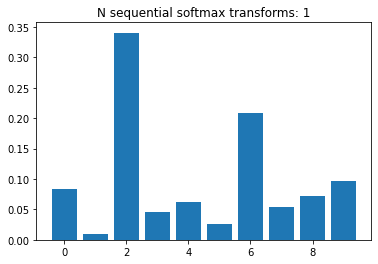

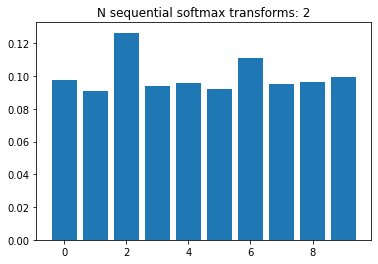

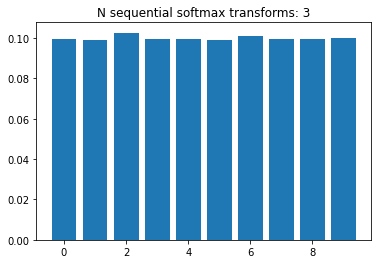

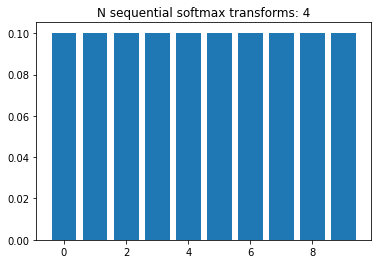

In [82]:
x_new = x
for n_sequential_softmax_transforms in range(1, 5):
    x_new = F.softmax(x_new, dim=1)
    
    fig = plt.figure()
    plt.bar(range(10), x_new.numpy().squeeze())
    plt.title('N sequential softmax transforms: {}'.format(n_sequential_softmax_transforms))
    plt.show()

As you can see, the _entropy_ of the labels distribution increases (so it becomes closer to uniform) if you use several `softmax` transformations in a row. But it won't affect the accuracy at first sight, because softmax preserves the maximum value position.

In [83]:
# loss_function = nn.NLLLoss()
loss_function = nn.CrossEntropyLoss()

In [84]:
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

In [85]:
# example loss
loss_function(model(X_train_torch[:3]), y_train_torch[:3])

tensor(1.1846, grad_fn=<NllLossBackward>)

In [87]:
!pip install scikit-plot

In [88]:
from sklearn.metrics import accuracy_score, f1_score
import scikitplot

In [89]:
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

In [90]:
# To reduce learning rate on plateau of the loss functions
lr_scheduler = ReduceLROnPlateau(opt, patience=5)

In [91]:
opt

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0.01
)

In [92]:
from IPython import display

In [93]:
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

local_train_loss_history = []
local_train_acc_history = []
for i in range(5000):
    
    # sample 256 random observations
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = X_train_torch[ix]
    y_batch = y_train_torch[ix]
    
    # predict log-probabilities or logits
    ### YOUR CODE
    
    # compute loss, just like before
    loss = ### YOUR CODE

    
    # compute gradients
    ### YOUR CODE
    
    # Adam step
    ### YOUR CODE
    
    # clear gradients
    ### YOUR CODE
    
    local_train_loss_history.append(loss.data.numpy())
    local_train_acc_history.append(
        accuracy_score(
            y_batch.detach().numpy(),
            y_predicted.detach().numpy().argmax(axis=1)
        )
    )
    
    if i % 200 == 0:
        train_loss_history.append(np.mean(local_train_loss_history))
        train_acc_history.append(np.mean(local_train_acc_history))
        local_train_loss_history, local_train_acc_history = [], []

        predictions_val = model(X_test_torch)
        val_loss_history.append(loss_function(predictions_val, y_test_torch).detach().item())
        
        acc_score_val = accuracy_score(y_test, predictions_val.detach().numpy().argmax(axis=1))
        val_acc_history.append(acc_score_val)
        lr_scheduler.step(train_loss_history[-1])
        
        display.clear_output()
        plot_train_process(train_loss_history, val_loss_history, train_acc_history, val_acc_history)

SyntaxError: ignored

Now we get the predictions

In [ ]:
y_predicted_train = model(torch.from_numpy(
    X_train_scaled
).type(torch.float32)).detach().numpy()


y_predicted_test = model(torch.from_numpy(
    X_test_scaled
).type(torch.float32)).detach().numpy()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import scikitplot

In [ ]:
print('Accuracy train: {}\nAccuracy  test: {}\nf1 train: {}\nf1 test: {}'.format(
    accuracy_score(y_train, np.argmax(y_predicted_train, axis=1)),
    accuracy_score(y_test, np.argmax(y_predicted_test, axis=1)),
    f1_score(y_train, np.argmax(y_predicted_train, axis=1), average='macro'),
    f1_score(y_test, np.argmax(y_predicted_test, axis=1), average='macro')
))

In [ ]:
print('Accuracy train: {}\nAccuracy  test: {}\nf1 train: {}\nf1 test: {}'.format(
    accuracy_score(y_train, np.argmax(y_predicted_train, axis=1)),
    accuracy_score(y_test, np.argmax(y_predicted_test, axis=1)),
    f1_score(y_train, np.argmax(y_predicted_train, axis=1), average='weighted'),
    f1_score(y_test, np.argmax(y_predicted_test, axis=1), average='weighted')
))

In [ ]:
scikitplot.metrics.plot_roc(y_test, y_predicted_test)

__Not that good, yeah? Let's get back and make it really work__

### And now let's do in with texts

In [ ]:
try:
    data = pd.read_csv('../datasets/comments_small_dataset/comments.tsv', sep='\t')
except FileNotFoundError:
    ! wget https://raw.githubusercontent.com/neychev/made_nlp_course/master/datasets/comments_small_dataset/comments.tsv -nc
    data = pd.read_csv("comments.tsv", sep='\t')

In [ ]:
import pandas as pd
data = pd.read_csv("comments.tsv", sep='\t')

texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

In [ ]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "I don\'t want to do that" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

In [ ]:

# task: preprocess each comment in train and test

texts_train =  ### YOUR CODE HERE
texts_test = ### YOUR CODE HERE

In [ ]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

In [ ]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurences (highest first)

k = min(10000, len(set(' '.join(texts_train).split())))
bow_vocabulary = ### YOUR CODE HERE

print('example features:', sorted(bow_vocabulary)[::100])

In [ ]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    #<YOUR CODE>

    return np.array(<...>, 'float32')

In [ ]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [ ]:
# Small check that everything is done properly
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

Let's solve it using `sklearn` logistic regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression().fit(X_train_bow, y_train)

In [ ]:
X_train_bow.shape

In [ ]:
model.score(X_train_bow, y_train)

In [ ]:
model.score(X_test_bow, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

And now let's achieve similar results using PyTorch:

In [ ]:
linear_model = ### YOUR CODE HERE
opt = ### YOUR CODE HERE
loss_func = ### YOUR CODE HERE

X_train_bow_torch = torch.from_numpy(X_train_bow)
y_train_torch = torch.from_numpy(y_train)

In [ ]:
# Simple training loop. No need in batch generation in here
for _ in range(100):
    ### YOUR CODE HERE

In [ ]:
y_pred_train = linear_model(X_train_bow_torch).argmax(dim=1).numpy()

In [ ]:
y_pred_test = linear_model(torch.from_numpy(X_test_bow)).argmax(dim=1).numpy()

In [ ]:
np.mean(y_pred_train == y_train)

In [ ]:
np.mean(y_pred_test == y_test)

### Extra stuff: NotMNIST

In [ ]:
! wget https://raw.githubusercontent.com/neychev/made_nlp_course/master/week01_Intro/notmnist.py -nc

In [ ]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist()
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i"%(len(X_train),len(X_test)))

In [ ]:
for i in [0,1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

In [ ]:
# Your turn: create a multiclass classifier in here for notMNIST dataset.

In [ ]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit. 
model.add_module('l1', # YOUR CODE HERE)
model.add_module('a1', # YOUR CODE HERE)
...

Take a look at the model structure:

In [ ]:
torchsummary.summary(model)

Let's check that everything works correctly:

In [ ]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted # display what we've got

Let's call the loss function from `torch.nn`.

In [ ]:
loss_function = nn.CrossEntropyLoss()

Define some optimizer for your model parameters:

In [ ]:
opt = # YOUR CODE HERE

Compute the loss for some batch of objects:

In [ ]:
loss = # YOUR CODE HERE

Do a backward pass and optimizator step:

In [ ]:
# YOUR CODE HERE

Finally, implement the optimization pipeline and monitor the model quality during the optimization.

In [ ]:
# YOUR CODE HERE